Import necessary librabries and etc

In [1267]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

import yfinance as yf
import yahoo_finance
import talib
import ta
import pandas_ta as pta
from finta import TA

import technical_indicators as ti
import trade

### Step 1: Import the APPLE, AMD & NVIDIA dataset into a Pandas DataFrame.

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime,marketCap,dcf
date,,,,,,,,,,,,,
2022-09-22,73.89,74.2900,69.1700,69.50,69.50,101405425.0,101405425.0,-4.39,-5.941,70.98667,-0.05941,1.121952e+11,72.541667
2022-09-23,68.00,69.0801,66.8216,67.96,67.96,87653233.0,87653233.0,-0.04,-0.059,67.95390,-0.00059,1.097092e+11,71.001667
2022-09-26,67.87,68.7400,66.2500,66.30,66.30,81596933.0,81596933.0,-1.57,-2.313,67.09667,-0.02313,1.070294e+11,69.341667
2022-09-27,67.90,68.7800,66.0000,67.17,67.17,94852032.0,94852032.0,-0.73,-1.075,67.31667,-0.01075,1.103549e+11,70.211667
2022-09-28,67.11,68.7979,66.5600,68.36,68.36,72229882.0,72229882.0,1.25,1.863,67.90597,0.01863,NaN,NaN


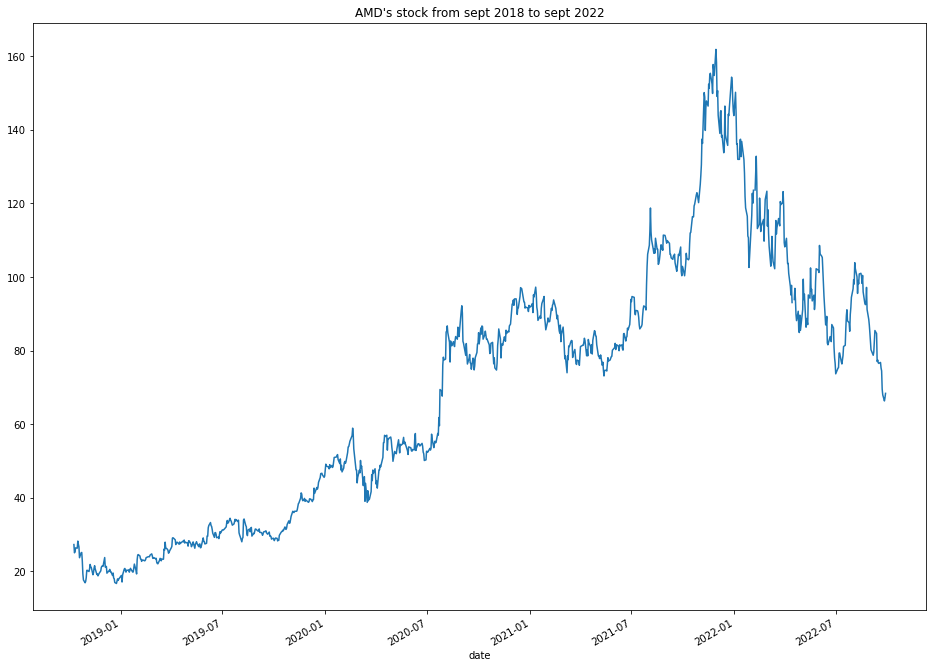

In [1268]:
# Import the AMD OHLCV dataset into a Pandas Dataframe
amd_stock_data_df = pd.read_csv(
    Path("./Resources/AMD_data.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

amd_stock_data_df["adjClose"].plot(title="AMD's stock from sept 2018 to sept 2022", figsize=(16, 12));

# Review the DataFrame
amd_stock_data_df.tail()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime,marketCap,dcf
date,,,,,,,,,,,,,
2022-09-22,130.699997,131.490005,124.279999,125.610001,125.610001,75916200.0,75916200.0,-5.09000,-3.894,127.12667,-0.03894,3.130201e+11,126.807536
2022-09-23,124.199997,126.110001,122.570000,125.160004,125.160004,66184000.0,66184000.0,0.96001,0.773,124.61333,0.00773,3.118987e+11,126.357536
2022-09-26,124.910004,126.589996,122.139999,122.279999,122.279999,54734300.0,54734300.0,-2.63000,-2.106,123.67000,-0.02106,3.047218e+11,123.477536
2022-09-27,125.070000,127.360000,122.580000,124.130000,124.130000,55389461.0,55389461.0,-0.94000,-0.752,124.69000,-0.00752,3.093320e+11,125.327536
2022-09-28,124.100000,128.230000,123.550000,127.360000,127.360000,54127244.0,54127244.0,3.26000,2.627,126.38000,0.02627,3.173811e+11,128.557536


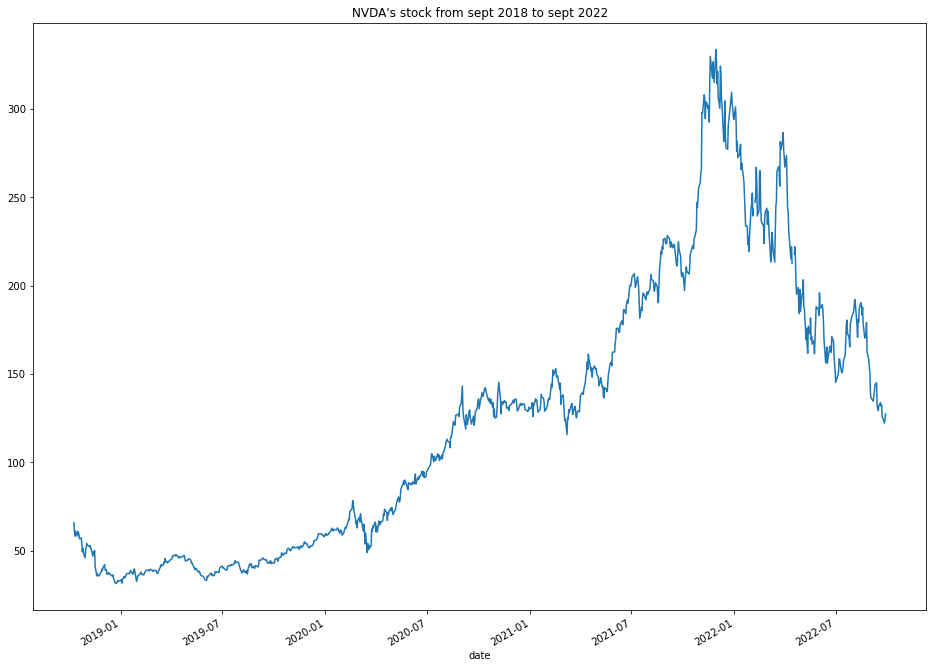

In [1269]:
# Import the AMD OHLCV dataset into a Pandas Dataframe
nvda_stock_data_df = pd.read_csv(
    Path("./Resources/NVDA_data.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

nvda_stock_data_df["adjClose"].plot(title="NVDA's stock from sept 2018 to sept 2022", figsize=(16, 12));

# Review the DataFrame
display(nvda_stock_data_df.tail())

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-19,54.625000,54.904999,53.825001,54.592499,52.595245,108495200
2018-09-20,55.060001,55.570000,54.787498,55.007500,52.995064,106435200
2018-09-21,55.195000,55.340000,54.322498,54.415001,52.424240,384986800
2018-09-24,54.205002,55.314999,54.157501,55.197498,53.178112,110773600
2018-09-25,54.937500,55.705002,54.924999,55.547501,53.515308,98217600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-21,157.339996,158.740005,153.600006,153.720001,153.720001,101696800
2022-09-22,152.380005,154.470001,150.910004,152.740005,152.740005,86652500
2022-09-23,151.190002,151.470001,148.559998,150.429993,150.429993,95939200
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700


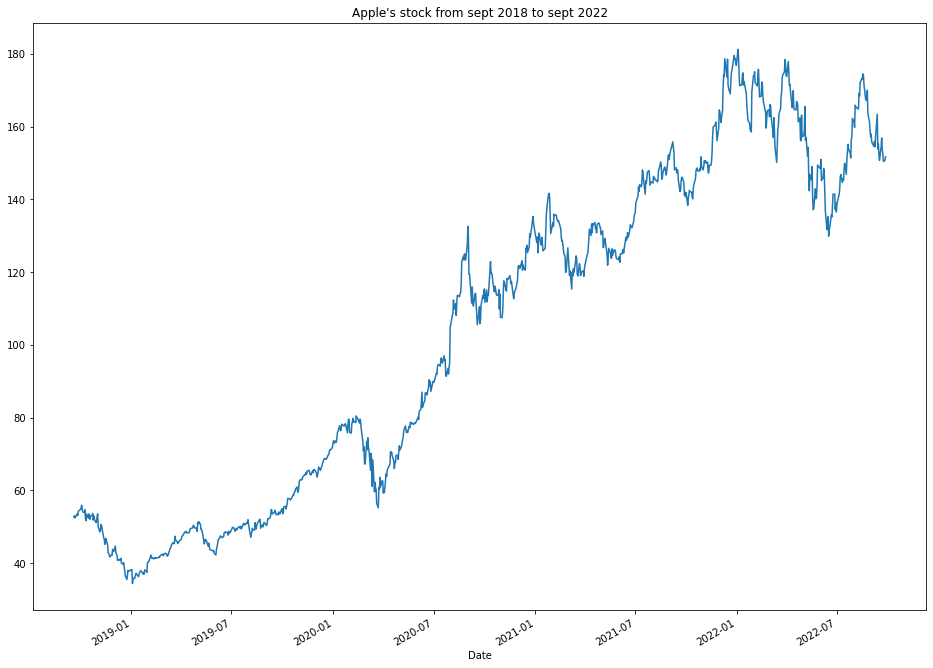

In [1270]:
# Import the APPL stock data from yahoo finance library
appl_stock_data_df = yf.download("AAPL", 
                 start="2018-09-19", 
                 end="2022-09-28")

appl_stock_data_df["Adj Close"].plot(title="Apple's stock from sept 2018 to sept 2022", figsize=(16, 12));

# Review the DataFrame
display(appl_stock_data_df.head())
display(appl_stock_data_df.tail())

### Step 2: Filter out the necessary data for AMD & NVIDIA dataset into a Pandas DataFrame.

In [1271]:
# Filter the date index and close columns for AMD
amd_signals_df = amd_stock_data_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
amd_signals_df["AMD Actual Returns"] = amd_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
amd_signals_df = amd_signals_df.dropna()

# Review the DataFrame
display(amd_signals_df.head())
display(amd_signals_df.tail())

,close,AMD Actual Returns
date,,
2018-10-10,25.000000,-0.082232
2018-10-11,25.299999,0.012000
2018-10-12,26.340000,0.041107
2018-10-15,26.260000,-0.003037
2018-10-16,28.180000,0.073115


,close,AMD Actual Returns
date,,
2022-09-22,69.50,-0.066864
2022-09-23,67.96,-0.022158
2022-09-26,66.30,-0.024426
2022-09-27,67.17,0.013122
2022-09-28,68.36,0.017716


In [1272]:
# Filter the date index and close columns for AMD
nvda_signals_df = nvda_stock_data_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
nvda_signals_df["NVDA Actual Returns"] = nvda_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
nvda_signals_df = nvda_signals_df.dropna()

# Review the DataFrame
display(nvda_signals_df.head())
display(nvda_signals_df.tail())

,close,NVDA Actual Returns
date,,
2018-10-10,61.422501,-0.074753
2018-10-11,58.782501,-0.042981
2018-10-12,61.634998,0.048526
2018-10-15,58.845001,-0.045266
2018-10-16,61.457501,0.044396


,close,NVDA Actual Returns
date,,
2022-09-22,125.610001,-0.052786
2022-09-23,125.160004,-0.003582
2022-09-26,122.279999,-0.023011
2022-09-27,124.130000,0.015129
2022-09-28,127.360000,0.026021


In [1273]:
# Filter the date index and close columns for AMD
appl_signals_df = appl_stock_data_df.loc[:, ["Close"]]

# Use the pct_change function to generate  returns from close prices
appl_signals_df["APPL Actual Returns"] = appl_signals_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
appl_signals_df = appl_signals_df.dropna()

# Review the DataFrame
display(appl_signals_df.head())
display(appl_signals_df.tail())

,Close,APPL Actual Returns
Date,,
2018-09-20,55.007500,0.007602
2018-09-21,54.415001,-0.010771
2018-09-24,55.197498,0.014380
2018-09-25,55.547501,0.006341
2018-09-26,55.105000,-0.007966


,Close,APPL Actual Returns
Date,,
2022-09-21,153.720001,-0.020268
2022-09-22,152.740005,-0.006375
2022-09-23,150.429993,-0.015124
2022-09-26,150.770004,0.002260
2022-09-27,151.759995,0.006566


### Step 2: Generate trading signals tech analysis strategy

In [1274]:
# Set the short window and long window
short_window = 4
long_window = 100

# instantiate the bollinger indicator
amd_ta_bbands = ta.volatility.BollingerBands(close=amd_stock_data_df["close"], 
                                         window=20, 
                                         window_dev=2)
nvda_ta_bbands = ta.volatility.BollingerBands(close=nvda_stock_data_df["close"], 
                                         window=20, 
                                         window_dev=2)
appl_ta_bbands = ta.volatility.BollingerBands(close=appl_stock_data_df["Close"], 
                                         window=20, 
                                         window_dev=2)

#setup bollinger bands lines
# amd_signals_df['AMD bb_upper'],amd_signals_df['AMD bb_middle'],amd_signals_df['AMD bb_lower'] = talib.BBANDS(amd_signals_df["close"], timeperiod=20)
amd_signals_df['AMD bb_upper'] = amd_ta_bbands.bollinger_hband()
amd_signals_df['AMD bb_middle'] = amd_ta_bbands.bollinger_mavg()
amd_signals_df['AMD bb_lower'] = amd_ta_bbands.bollinger_lband()
# nvda_signals_df['NVDA bb_upper'],nvda_signals_df['NVDA bb_middle'],nvda_signals_df['NVDA bb_lower'] = talib.BBANDS(nvda_signals_df["close"], timeperiod=20)
nvda_signals_df['NVDA bb_upper'] = nvda_ta_bbands.bollinger_hband()
nvda_signals_df['NVDA bb_middle'] = nvda_ta_bbands.bollinger_mavg()
nvda_signals_df['NVDA bb_lower'] = nvda_ta_bbands.bollinger_lband()
#appl_signals_df['APPL bb_upper'],appl_signals_df['APPL bb_middle'],appl_signals_df['APPL bb_lower'] = talib.BBANDS(appl_signals_df["Close"], timeperiod=20)
appl_signals_df['APPL bb_upper1'] = appl_ta_bbands.bollinger_hband()
appl_signals_df['APPL bb_middle1'] = appl_ta_bbands.bollinger_mavg()
appl_signals_df['APPL bb_lower1'] = appl_ta_bbands.bollinger_lband()

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
amd_signals_df['AMD SMA_Fast'] = amd_signals_df['close'].rolling(window=short_window).mean()
amd_signals_df['AMD SMA_Slow'] = amd_signals_df['close'].rolling(window=long_window).mean()

nvda_signals_df['NVDA SMA_Fast'] = nvda_signals_df['close'].rolling(window=short_window).mean()
nvda_signals_df['NVDA SMA_Slow'] = nvda_signals_df['close'].rolling(window=long_window).mean()

appl_signals_df['APPL SMA_Fast'] = appl_signals_df['Close'].rolling(window=short_window).mean()
appl_signals_df['APPL SMA_Slow'] = appl_signals_df['Close'].rolling(window=long_window).mean()

amd_signals_df = amd_signals_df.dropna()
nvda_signals_df = nvda_signals_df.dropna()
appl_signals_df = appl_signals_df.dropna()

# Initialize the new Signal column
amd_signals_df['AMD Signal'] = 0.0
nvda_signals_df['NVDA Signal'] = 0.0
appl_signals_df['APPL Signal'] = 0.0

# Review the DataFrame
display(amd_signals_df.head())
display(amd_signals_df.tail())
display(nvda_signals_df.head())
display(nvda_signals_df.tail())
display(appl_signals_df.head())
display(appl_signals_df.tail())

,close,AMD Actual Returns,AMD bb_upper,AMD bb_middle,AMD bb_lower,AMD SMA_Fast,AMD SMA_Slow,AMD Signal
date,,,,,,,,
2019-03-06,22.410000,-0.046383,24.641522,23.4745,22.307478,23.240,21.3301,0.0
2019-03-07,22.080000,-0.014726,24.729935,23.4155,22.101065,22.840,21.3009,0.0
2019-03-08,22.010000,-0.003170,24.799298,23.3825,21.965702,22.500,21.2680,0.0
2019-03-11,22.959999,0.043162,24.799557,23.3780,21.956443,22.365,21.2342,0.0
2019-03-12,23.490000,0.023084,24.813606,23.4045,21.995394,22.635,21.2065,0.0


,close,AMD Actual Returns,AMD bb_upper,AMD bb_middle,AMD bb_lower,AMD SMA_Fast,AMD SMA_Slow,AMD Signal
date,,,,,,,,
2022-09-22,69.50,-0.066864,94.021779,81.304,68.586221,74.0000,89.3970,0.0
2022-09-23,67.96,-0.022158,91.607642,79.843,68.078358,71.7975,89.1782,0.0
2022-09-26,66.30,-0.024426,90.565358,78.599,66.632642,69.5600,88.9299,0.0
2022-09-27,67.17,0.013122,89.583159,77.533,65.482841,67.7325,88.6074,0.0
2022-09-28,68.36,0.017716,88.473483,76.604,64.734517,67.4475,88.3523,0.0


,close,NVDA Actual Returns,NVDA bb_upper,NVDA bb_middle,NVDA bb_lower,NVDA SMA_Fast,NVDA SMA_Slow,NVDA Signal
date,,,,,,,,
2019-03-06,38.012501,-0.028559,40.434146,38.604625,36.775105,38.862500,41.723850,0.0
2019-03-07,37.314999,-0.018349,40.467293,38.557875,36.648457,38.413125,41.482775,0.0
2019-03-08,37.660000,0.009246,40.392750,38.598125,36.803500,38.029375,41.271550,0.0
2019-03-11,40.285000,0.069703,40.549287,38.760250,36.971213,38.318125,41.058050,0.0
2019-03-12,40.630001,0.008564,40.639183,38.961125,37.283067,38.972500,40.875900,0.0


,close,NVDA Actual Returns,NVDA bb_upper,NVDA bb_middle,NVDA bb_lower,NVDA SMA_Fast,NVDA SMA_Slow,NVDA Signal
date,,,,,,,,
2022-09-22,125.610001,-0.052786,167.728183,141.473499,115.218815,130.950001,166.8487,0.0
2022-09-23,125.160004,-0.003582,159.506722,138.774998,118.043275,128.785000,166.1470,0.0
2022-09-26,122.279999,-0.023011,155.585525,136.758998,117.932471,126.415001,165.4096,0.0
2022-09-27,124.130000,0.015129,151.933221,135.064998,118.196776,124.295001,164.6175,0.0
2022-09-28,127.360000,0.026021,148.259112,133.698999,119.138885,124.732501,164.0067,0.0


,Close,APPL Actual Returns,APPL bb_upper1,APPL bb_middle1,APPL bb_lower1,APPL SMA_Fast,APPL SMA_Slow,APPL Signal
Date,,,,,,,,
2019-02-13,42.544998,-0.004155,44.695374,40.825125,36.954876,42.556874,46.359425,0.0
2019-02-14,42.700001,0.003643,44.851027,41.023375,37.195723,42.581249,46.236350,0.0
2019-02-15,42.605000,-0.002225,44.969860,41.205375,37.440889,42.643125,46.118250,0.0
2019-02-19,42.732498,0.002993,45.084862,41.381750,37.678637,42.645624,45.993600,0.0
2019-02-20,43.007500,0.006435,45.102084,41.615875,38.129666,42.761250,45.868200,0.0


,Close,APPL Actual Returns,APPL bb_upper1,APPL bb_middle1,APPL bb_lower1,APPL SMA_Fast,APPL SMA_Slow,APPL Signal
Date,,,,,,,,
2022-09-21,153.720001,-0.020268,167.613664,157.776499,147.939335,153.949997,152.1907,0.0
2022-09-22,152.740005,-0.006375,166.016391,157.037000,148.057608,154.459999,152.1416,0.0
2022-09-23,150.429993,-0.015124,163.251078,156.056999,148.862921,153.447498,152.0663,0.0
2022-09-26,150.770004,0.002260,162.066885,155.414500,148.762115,151.915001,151.9792,0.0
2022-09-27,151.759995,0.006566,161.169075,154.933499,148.697923,151.424999,151.8366,0.0


<AxesSubplot:title={'center':"AMD's stock from sept 2018 to sept 2022 w/ Bollinger bands"}, xlabel='date'>

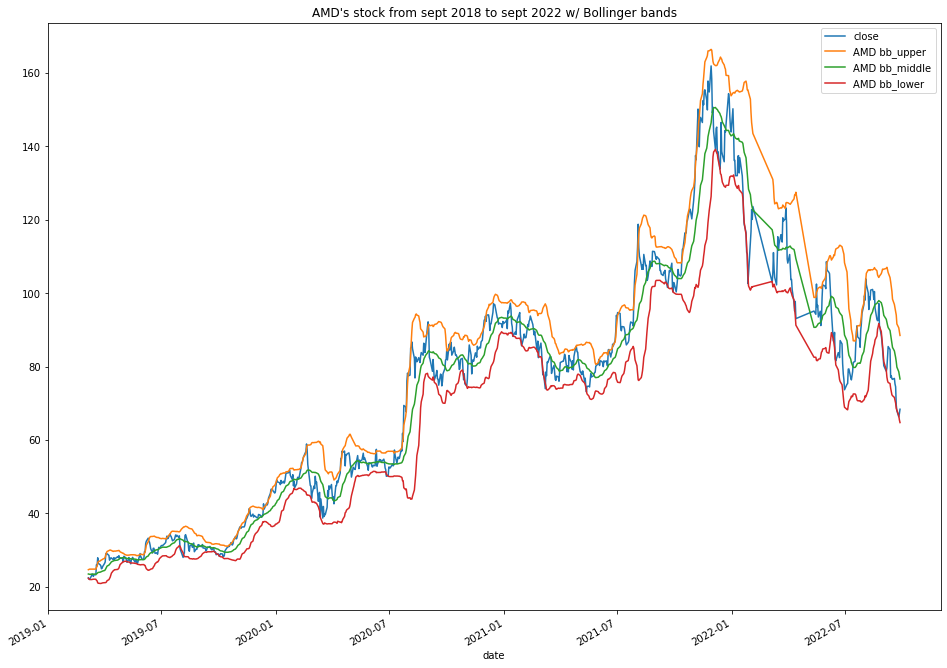

In [1275]:
amd_signals_df[["close","AMD bb_upper", "AMD bb_middle", "AMD bb_lower"]].plot(title="AMD's stock from sept 2018 to sept 2022 w/ Bollinger bands", figsize=(16, 12))

<AxesSubplot:title={'center':"NVDA's stock from sept 2018 to sept 2022 w/ Bollinger bands"}, xlabel='date'>

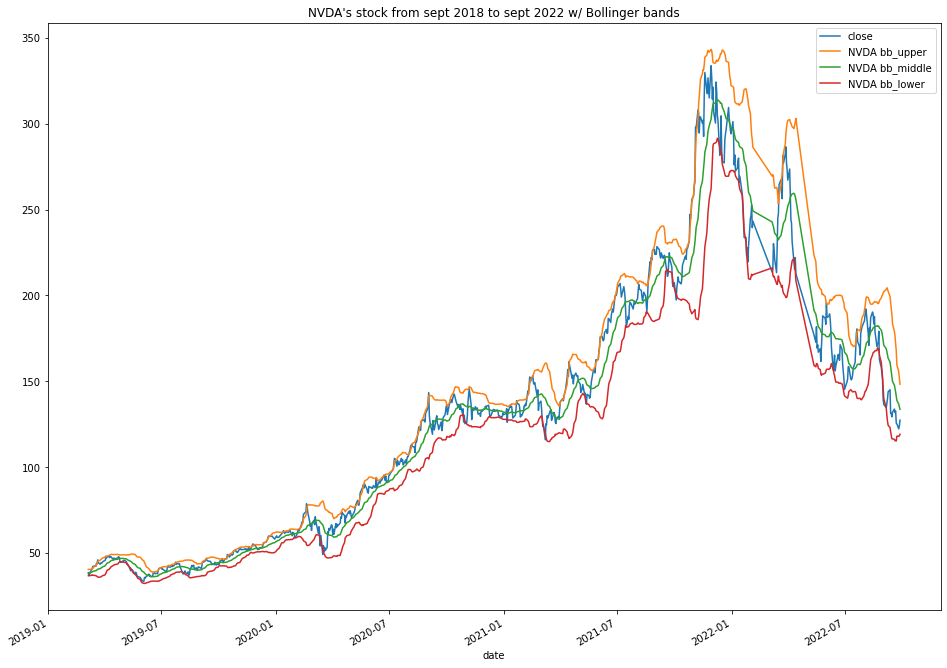

In [1276]:
nvda_signals_df[["close","NVDA bb_upper", "NVDA bb_middle", "NVDA bb_lower"]].plot(title="NVDA's stock from sept 2018 to sept 2022 w/ Bollinger bands", figsize=(16, 12))

<AxesSubplot:title={'center':"Apple's stock from sept 2018 to sept 2022 w/ Bollinger bands"}, xlabel='Date'>

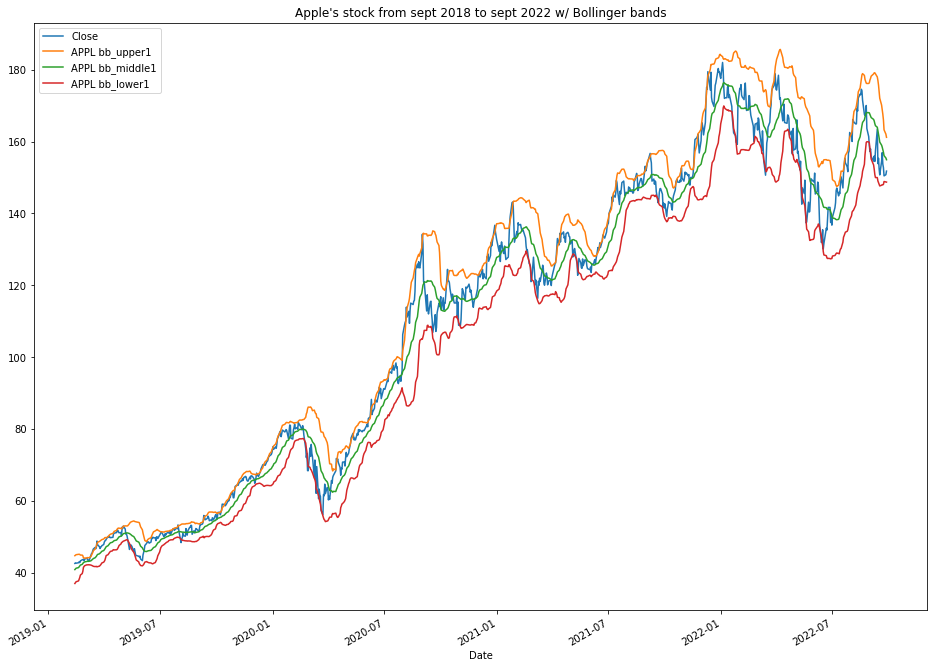

In [1277]:
appl_signals_df[["Close","APPL bb_upper1", "APPL bb_middle1", "APPL bb_lower1"]].plot(title="Apple's stock from sept 2018 to sept 2022 w/ Bollinger bands", figsize=(16, 12))

In [1278]:
# #setup bollinger bands lines
# # amd_signals_df['AMD bb_upper'],amd_signals_df['AMD bb_middle'],amd_signals_df['AMD bb_lower'] = talib.BBANDS(amd_signals_df["close"], timeperiod=20)
# amd_signals_df['AMD bb_upper'] = amd_ta_bbands.bollinger_hband()
# amd_signals_df['AMD bb_middle'] = amd_ta_bbands.bollinger_mavg()
# amd_signals_df['AMD bb_lower'] = amd_ta_bbands.bollinger_lband()
# # nvda_signals_df['NVDA bb_upper'],nvda_signals_df['NVDA bb_middle'],nvda_signals_df['NVDA bb_lower'] = talib.BBANDS(nvda_signals_df["close"], timeperiod=20)
# nvda_signals_df['NVDA bb_upper'] = nvda_ta_bbands.bollinger_hband()
# nvda_signals_df['NVDA bb_middle'] = nvda_ta_bbands.bollinger_mavg()
# nvda_signals_df['NVDA bb_lower'] = nvda_ta_bbands.bollinger_lband()
# #appl_signals_df['APPL bb_upper'],appl_signals_df['APPL bb_middle'],appl_signals_df['APPL bb_lower'] = talib.BBANDS(appl_signals_df["Close"], timeperiod=20)
# appl_signals_df['APPL bb_upper1'] = appl_ta_bbands.bollinger_hband()
# appl_signals_df['APPL bb_middle1'] = appl_ta_bbands.bollinger_mavg()
# appl_signals_df['APPL bb_lower1'] = appl_ta_bbands.bollinger_lband()

In [1279]:
# add Bollinger Bands low/high indicator
amd_signals_df["bb_high_ind"] = amd_ta_bbands.bollinger_hband_indicator()
amd_signals_df["bb_low_ind"] = amd_ta_bbands.bollinger_lband_indicator()

# add additional measures
amd_signals_df["bb_width"] = amd_ta_bbands.bollinger_wband()
amd_signals_df["bb_pct"] = amd_ta_bbands.bollinger_pband()

#calculate bolllinger trading signal
# %B = (Price - Lower Band)/(Upper Band - Lower Band)

amd_signals_df['BB Signal'] = 1

# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_bb_signal = 0
prev_bb_pct = 0
# Loop through the Pandas DataFrame and initiate a trade each iteration
for index, row in amd_signals_df.iterrows():
    # buy if the previous bb_signal is 0, in other words, buy on the first day
    #BB_Signal = -1
    
    if ((previous_bb_signal == 1) & ((amd_signals_df.loc[index, "bb_pct"] <= 0.5))):
        amd_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]
        
    elif ((previous_bb_signal == 1) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct < 0.5))):
        amd_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 1) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        amd_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]    
        
    elif ((previous_bb_signal == 1) & ((amd_signals_df.loc[index, "bb_pct"] > 0.9 ) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        amd_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]    
        
    elif ((previous_bb_signal == 1) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct > 0.9))):
        amd_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]  
        
        
        
    elif ((previous_bb_signal == 0) & ((amd_signals_df.loc[index, "bb_pct"] < 0.5))):
        amd_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]
        

        
    elif ((previous_bb_signal == 0) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct < 0.5))):
        amd_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        amd_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"] 
        
    elif ((previous_bb_signal == 0) & ((amd_signals_df.loc[index, "bb_pct"] > 0.9 ) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        amd_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct > 0.9))):
        amd_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((amd_signals_df.loc[index, "bb_pct"] > 0.5) & (amd_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        amd_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = amd_signals_df.loc[index, "bb_pct"]
        

display(amd_signals_df.head())
display(amd_signals_df.tail())

,close,AMD Actual Returns,AMD bb_upper,AMD bb_middle,AMD bb_lower,AMD SMA_Fast,AMD SMA_Slow,AMD Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal
date,,,,,,,,,,,,,
2019-03-06,22.410000,-0.046383,24.641522,23.4745,22.307478,23.240,21.3301,0.0,0.0,0.0,9.942888,0.043924,0
2019-03-07,22.080000,-0.014726,24.729935,23.4155,22.101065,22.840,21.3009,0.0,0.0,1.0,11.227051,-0.008013,0
2019-03-08,22.010000,-0.003170,24.799298,23.3825,21.965702,22.500,21.2680,0.0,0.0,0.0,12.118444,0.015633,0
2019-03-11,22.959999,0.043162,24.799557,23.3780,21.956443,22.365,21.2342,0.0,0.0,0.0,12.161494,0.352978,0
2019-03-12,23.490000,0.023084,24.813606,23.4045,21.995394,22.635,21.2065,0.0,0.0,0.0,12.041324,0.530338,1


,close,AMD Actual Returns,AMD bb_upper,AMD bb_middle,AMD bb_lower,AMD SMA_Fast,AMD SMA_Slow,AMD Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal
date,,,,,,,,,,,,,
2022-09-22,69.50,-0.066864,94.021779,81.304,68.586221,74.0000,89.3970,0.0,0.0,0.0,31.284509,0.035925,0
2022-09-23,67.96,-0.022158,91.607642,79.843,68.078358,71.7975,89.1782,0.0,0.0,1.0,29.469439,-0.005030,0
2022-09-26,66.30,-0.024426,90.565358,78.599,66.632642,69.5600,88.9299,0.0,0.0,1.0,30.449135,-0.013899,0
2022-09-27,67.17,0.013122,89.583159,77.533,65.482841,67.7325,88.6074,0.0,0.0,0.0,31.083948,0.070006,0
2022-09-28,68.36,0.017716,88.473483,76.604,64.734517,67.4475,88.3523,0.0,0.0,0.0,30.989198,0.152723,0


In [1280]:
# add Bollinger Bands low/high indicator
nvda_signals_df["bb_high_ind"] = nvda_ta_bbands.bollinger_hband_indicator()
nvda_signals_df["bb_low_ind"] = nvda_ta_bbands.bollinger_lband_indicator()

# add additional measures
nvda_signals_df["bb_width"] = nvda_ta_bbands.bollinger_wband()
nvda_signals_df["bb_pct"] = nvda_ta_bbands.bollinger_pband()

#calculate bolllinger trading signal
# %B = (Price - Lower Band)/(Upper Band - Lower Band)

nvda_signals_df['BB Signal'] = 1

# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_bb_signal = 0
prev_bb_pct = 0
# Loop through the Pandas DataFrame and initiate a trade each iteration
for index, row in nvda_signals_df.iterrows():
    # buy if the previous bb_signal is 0, in other words, buy on the first day
    #BB_Signal = -1
    
    if ((previous_bb_signal == 1) & ((nvda_signals_df.loc[index, "bb_pct"] <= 0.5))):
        nvda_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]
        
    elif ((previous_bb_signal == 1) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct < 0.5))):
        nvda_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 1) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        nvda_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]    
        
    elif ((previous_bb_signal == 1) & ((nvda_signals_df.loc[index, "bb_pct"] > 0.9 ) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        nvda_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]    
        
    elif ((previous_bb_signal == 1) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct > 0.9))):
        nvda_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]  
        
        
        
    elif ((previous_bb_signal == 0) & ((nvda_signals_df.loc[index, "bb_pct"] < 0.5))):
        nvda_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]
        

        
    elif ((previous_bb_signal == 0) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct < 0.5))):
        nvda_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        nvda_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"] 
        
    elif ((previous_bb_signal == 0) & ((nvda_signals_df.loc[index, "bb_pct"] > 0.9 ) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        nvda_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct > 0.9))):
        nvda_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((nvda_signals_df.loc[index, "bb_pct"] > 0.5) & (nvda_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        nvda_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = nvda_signals_df.loc[index, "bb_pct"]
        

display(nvda_signals_df.head())
display(nvda_signals_df.tail())

,close,NVDA Actual Returns,NVDA bb_upper,NVDA bb_middle,NVDA bb_lower,NVDA SMA_Fast,NVDA SMA_Slow,NVDA Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal
date,,,,,,,,,,,,,
2019-03-06,38.012501,-0.028559,40.434146,38.604625,36.775105,38.862500,41.723850,0.0,0.0,0.0,9.478245,0.338175,0
2019-03-07,37.314999,-0.018349,40.467293,38.557875,36.648457,38.413125,41.482775,0.0,0.0,0.0,9.904168,0.174541,0
2019-03-08,37.660000,0.009246,40.392750,38.598125,36.803500,38.029375,41.271550,0.0,0.0,0.0,9.299025,0.238629,0
2019-03-11,40.285000,0.069703,40.549287,38.760250,36.971213,38.318125,41.058050,0.0,0.0,0.0,9.231299,0.926137,1
2019-03-12,40.630001,0.008564,40.639183,38.961125,37.283067,38.972500,40.875900,0.0,0.0,0.0,8.614011,0.997264,1


,close,NVDA Actual Returns,NVDA bb_upper,NVDA bb_middle,NVDA bb_lower,NVDA SMA_Fast,NVDA SMA_Slow,NVDA Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal
date,,,,,,,,,,,,,
2022-09-22,125.610001,-0.052786,167.728183,141.473499,115.218815,130.950001,166.8487,0.0,0.0,0.0,37.116045,0.197892,0
2022-09-23,125.160004,-0.003582,159.506722,138.774998,118.043275,128.785000,166.1470,0.0,0.0,0.0,29.878182,0.171639,0
2022-09-26,122.279999,-0.023011,155.585525,136.758998,117.932471,126.415001,165.4096,0.0,0.0,0.0,27.532415,0.115463,0
2022-09-27,124.130000,0.015129,151.933221,135.064998,118.196776,124.295001,164.6175,0.0,0.0,0.0,24.977933,0.175870,0
2022-09-28,127.360000,0.026021,148.259112,133.698999,119.138885,124.732501,164.0067,0.0,0.0,0.0,21.780438,0.282316,0


In [1281]:
#logic to create trading signal https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_band_perce

# add Bollinger Bands low/high indicator
appl_signals_df["bb_high_ind"] = appl_ta_bbands.bollinger_hband_indicator()
appl_signals_df["bb_low_ind"] = appl_ta_bbands.bollinger_lband_indicator()

# add additional measures
appl_signals_df["bb_width"] = appl_ta_bbands.bollinger_wband()
appl_signals_df["bb_pct"] = appl_ta_bbands.bollinger_pband()

#calculate bolllinger trading signal
# %B = (Price - Lower Band)/(Upper Band - Lower Band)

#CHECKPOINT3

appl_signals_df['BB Signal'] = 1

# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_bb_signal = 0
prev_bb_pct = 0
# Loop through the Pandas DataFrame and initiate a trade each iteration
for index, row in appl_signals_df.iterrows():
    # buy if the previous bb_signal is 0, in other words, buy on the first day
    #BB_Signal = -1
    
    #checkpoint
    if ((previous_bb_signal == 1) & ((appl_signals_df.loc[index, "bb_pct"] <= 0.5))):
        appl_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]
        
    elif ((previous_bb_signal == 1) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct < 0.5))):
        appl_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 1) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        appl_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]    
        
    elif ((previous_bb_signal == 1) & ((appl_signals_df.loc[index, "bb_pct"] > 0.9 ) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        appl_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]    
        
    elif ((previous_bb_signal == 1) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct > 0.9))):
        appl_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]  
        
        
        
    elif ((previous_bb_signal == 0) & ((appl_signals_df.loc[index, "bb_pct"] < 0.5))):
        appl_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]
        
#     elif ((previous_bb_signal == 0) & ((appl_signals_df.loc[index, "bb_pct"] > 0.9))):
#         appl_signals_df.loc[index, 'BB Signal'] = 1
#         previous_bb_signal = 1
#         prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]
        
    elif ((previous_bb_signal == 0) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct < 0.5))):
        appl_signals_df.loc[index, 'BB Signal'] = 1
        previous_bb_signal = 1
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        appl_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"] 
        
    elif ((previous_bb_signal == 0) & ((appl_signals_df.loc[index, "bb_pct"] > 0.9 ) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        appl_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]  
        
    elif ((previous_bb_signal == 0) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & (prev_bb_pct > 0.9))):
        appl_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]  
        
    
    
#     elif ((previous_bb_signal == -1) & ((appl_signals_df.loc[index, "bb_pct"] > 1.01 ) & (prev_bb_pct > 1.01))):
#         appl_signals_df.loc[index, 'BB Signal'] = 1
#         previous_bb_signal = 1
#         prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]
        
#     elif ((previous_bb_signal == 1) & ((appl_signals_df.loc[index, "bb_pct"] > 1.01 ) & (prev_bb_pct > 1.01))):
#         appl_signals_df.loc[index, 'BB Signal'] = 1
#         previous_bb_signal = 1
#         prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]

        
    elif ((previous_bb_signal == 0) & (((appl_signals_df.loc[index, "bb_pct"] > 0.5) & (appl_signals_df.loc[index, "bb_pct"] < 0.9)) & ((prev_bb_pct > 0.5) & (prev_bb_pct < 0.9)))):
        appl_signals_df.loc[index, 'BB Signal'] = 0
        previous_bb_signal = 0
        prev_bb_pct = appl_signals_df.loc[index, "bb_pct"]
        
    
    # When %B are greater than or equal to 0, generate signal to buy stock long
    #Conditions: 
    # [Daily SMA(20,Daily Volume) > 40000] 
    # AND [Daily SMA(60,Daily Close) > 5] 

    # AND [Daily %B(20,2.0,Daily Close) > 0.8] 
    # AND [Daily MFI(14) > 80] 
    # AND [Yesterday's Daily MFI(14) < 80]
        
#     elif ((previous_bb_signal == 1) & ((appl_signals_df.loc[index, "bb_pct"] < 0.3) | (appl_signals_df.loc[index, "bb_pct"] > 1.01))):
#         appl_signals_df.loc[index, 'BB Signal'] = -1
#         previous_bb_signal = -1
        
#     else:
#         appl_signals_df.loc[index, 'BB Signal'] = 1
#         previous_bb_signal = 1

    # When Actual Returns are less than 0, generate signal to sell stock short
    #Conditions: 
    # [Daily SMA(20,Daily Volume) > 40000] 
    # AND [Daily SMA(60,Daily Close) > 5] 

    # AND [Daily %B(20,2.0,Daily Close) < 0.2] 
    # AND [Daily MFI(14) < 20] 
    # AND [Yesterday's Daily MFI(14) > 20]
    #appl_signals_df.loc[(appl_signals_df["bb_pct"] < 0.3) | (appl_signals_df["bb_pct"] > 0.8), 'BB Signal'] = -1 #fix this sell signal
    #appl_signals_df.loc[(appl_signals_df["bb_pct"] <= 0.2), 'BB Signal'] = 1

display(appl_signals_df.head())
display(appl_signals_df.tail())

,Close,APPL Actual Returns,APPL bb_upper1,APPL bb_middle1,APPL bb_lower1,APPL SMA_Fast,APPL SMA_Slow,APPL Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal
Date,,,,,,,,,,,,,
2019-02-13,42.544998,-0.004155,44.695374,40.825125,36.954876,42.556874,46.359425,0.0,0.0,0.0,18.960132,0.722192,1
2019-02-14,42.700001,0.003643,44.851027,41.023375,37.195723,42.581249,46.236350,0.0,0.0,0.0,18.660835,0.719015,1
2019-02-15,42.605000,-0.002225,44.969860,41.205375,37.440889,42.643125,46.118250,0.0,0.0,0.0,18.271818,0.685899,1
2019-02-19,42.732498,0.002993,45.084862,41.381750,37.678637,42.645624,45.993600,0.0,0.0,0.0,17.897321,0.682380,1
2019-02-20,43.007500,0.006435,45.102084,41.615875,38.129666,42.761250,45.868200,0.0,0.0,0.0,16.754227,0.699590,1


,Close,APPL Actual Returns,APPL bb_upper1,APPL bb_middle1,APPL bb_lower1,APPL SMA_Fast,APPL SMA_Slow,APPL Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal
Date,,,,,,,,,,,,,
2022-09-21,153.720001,-0.020268,167.613664,157.776499,147.939335,153.949997,152.1907,0.0,0.0,0.0,12.469746,0.293818,0
2022-09-22,152.740005,-0.006375,166.016391,157.037000,148.057608,154.459999,152.1416,0.0,0.0,0.0,11.436020,0.260730,0
2022-09-23,150.429993,-0.015124,163.251078,156.056999,148.862921,153.447498,152.0663,0.0,0.0,0.0,9.219809,0.108914,0
2022-09-26,150.770004,0.002260,162.066885,155.414500,148.762115,151.915001,151.9792,0.0,0.0,0.0,8.560829,0.150915,0
2022-09-27,151.759995,0.006566,161.169075,154.933499,148.697923,151.424999,151.8366,0.0,0.0,0.0,8.049358,0.245532,0


In [1282]:
#count number of each signal
amd_signals_df['BB Signal'].value_counts()

1    496
0    366
Name: BB Signal, dtype: int64

In [1283]:
#count number of each signal
nvda_signals_df['BB Signal'].value_counts()

1    556
0    306
Name: BB Signal, dtype: int64

In [1284]:
#count number of each signal
appl_signals_df['BB Signal'].value_counts()

1    610
0    303
Name: BB Signal, dtype: int64

In [1285]:
# Calculate the strategy returns and add them to the signals_df DataFrame
amd_signals_df['AMD Strategy Returns'] = amd_signals_df['AMD Actual Returns'] * amd_signals_df['BB Signal'].shift()
nvda_signals_df['NVDA Strategy Returns'] = nvda_signals_df['NVDA Actual Returns'] * nvda_signals_df['BB Signal'].shift()
appl_signals_df['APPL Strategy Returns'] = appl_signals_df['APPL Actual Returns'] * appl_signals_df['BB Signal'].shift()

# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
amd_signals_df['Entry/Exit'] = amd_signals_df['BB Signal'].diff()
nvda_signals_df['Entry/Exit'] = nvda_signals_df['BB Signal'].diff()
appl_signals_df['Entry/Exit'] = appl_signals_df['BB Signal'].diff()

# Review the DataFrame
display(amd_signals_df.head())
display(amd_signals_df.tail())
display(nvda_signals_df.head())
display(nvda_signals_df.tail())
display(appl_signals_df.head())
display(appl_signals_df.tail())

,close,AMD Actual Returns,AMD bb_upper,AMD bb_middle,AMD bb_lower,AMD SMA_Fast,AMD SMA_Slow,AMD Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal,AMD Strategy Returns,Entry/Exit
date,,,,,,,,,,,,,,,
2019-03-06,22.410000,-0.046383,24.641522,23.4745,22.307478,23.240,21.3301,0.0,0.0,0.0,9.942888,0.043924,0,NaN,NaN
2019-03-07,22.080000,-0.014726,24.729935,23.4155,22.101065,22.840,21.3009,0.0,0.0,1.0,11.227051,-0.008013,0,-0.0,0.0
2019-03-08,22.010000,-0.003170,24.799298,23.3825,21.965702,22.500,21.2680,0.0,0.0,0.0,12.118444,0.015633,0,-0.0,0.0
2019-03-11,22.959999,0.043162,24.799557,23.3780,21.956443,22.365,21.2342,0.0,0.0,0.0,12.161494,0.352978,0,0.0,0.0
2019-03-12,23.490000,0.023084,24.813606,23.4045,21.995394,22.635,21.2065,0.0,0.0,0.0,12.041324,0.530338,1,0.0,1.0


,close,AMD Actual Returns,AMD bb_upper,AMD bb_middle,AMD bb_lower,AMD SMA_Fast,AMD SMA_Slow,AMD Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal,AMD Strategy Returns,Entry/Exit
date,,,,,,,,,,,,,,,
2022-09-22,69.50,-0.066864,94.021779,81.304,68.586221,74.0000,89.3970,0.0,0.0,0.0,31.284509,0.035925,0,-0.0,0.0
2022-09-23,67.96,-0.022158,91.607642,79.843,68.078358,71.7975,89.1782,0.0,0.0,1.0,29.469439,-0.005030,0,-0.0,0.0
2022-09-26,66.30,-0.024426,90.565358,78.599,66.632642,69.5600,88.9299,0.0,0.0,1.0,30.449135,-0.013899,0,-0.0,0.0
2022-09-27,67.17,0.013122,89.583159,77.533,65.482841,67.7325,88.6074,0.0,0.0,0.0,31.083948,0.070006,0,0.0,0.0
2022-09-28,68.36,0.017716,88.473483,76.604,64.734517,67.4475,88.3523,0.0,0.0,0.0,30.989198,0.152723,0,0.0,0.0


,close,NVDA Actual Returns,NVDA bb_upper,NVDA bb_middle,NVDA bb_lower,NVDA SMA_Fast,NVDA SMA_Slow,NVDA Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal,NVDA Strategy Returns,Entry/Exit
date,,,,,,,,,,,,,,,
2019-03-06,38.012501,-0.028559,40.434146,38.604625,36.775105,38.862500,41.723850,0.0,0.0,0.0,9.478245,0.338175,0,NaN,NaN
2019-03-07,37.314999,-0.018349,40.467293,38.557875,36.648457,38.413125,41.482775,0.0,0.0,0.0,9.904168,0.174541,0,-0.000000,0.0
2019-03-08,37.660000,0.009246,40.392750,38.598125,36.803500,38.029375,41.271550,0.0,0.0,0.0,9.299025,0.238629,0,0.000000,0.0
2019-03-11,40.285000,0.069703,40.549287,38.760250,36.971213,38.318125,41.058050,0.0,0.0,0.0,9.231299,0.926137,1,0.000000,1.0
2019-03-12,40.630001,0.008564,40.639183,38.961125,37.283067,38.972500,40.875900,0.0,0.0,0.0,8.614011,0.997264,1,0.008564,0.0


,close,NVDA Actual Returns,NVDA bb_upper,NVDA bb_middle,NVDA bb_lower,NVDA SMA_Fast,NVDA SMA_Slow,NVDA Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal,NVDA Strategy Returns,Entry/Exit
date,,,,,,,,,,,,,,,
2022-09-22,125.610001,-0.052786,167.728183,141.473499,115.218815,130.950001,166.8487,0.0,0.0,0.0,37.116045,0.197892,0,-0.0,0.0
2022-09-23,125.160004,-0.003582,159.506722,138.774998,118.043275,128.785000,166.1470,0.0,0.0,0.0,29.878182,0.171639,0,-0.0,0.0
2022-09-26,122.279999,-0.023011,155.585525,136.758998,117.932471,126.415001,165.4096,0.0,0.0,0.0,27.532415,0.115463,0,-0.0,0.0
2022-09-27,124.130000,0.015129,151.933221,135.064998,118.196776,124.295001,164.6175,0.0,0.0,0.0,24.977933,0.175870,0,0.0,0.0
2022-09-28,127.360000,0.026021,148.259112,133.698999,119.138885,124.732501,164.0067,0.0,0.0,0.0,21.780438,0.282316,0,0.0,0.0


,Close,APPL Actual Returns,APPL bb_upper1,APPL bb_middle1,APPL bb_lower1,APPL SMA_Fast,APPL SMA_Slow,APPL Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal,APPL Strategy Returns,Entry/Exit
Date,,,,,,,,,,,,,,,
2019-02-13,42.544998,-0.004155,44.695374,40.825125,36.954876,42.556874,46.359425,0.0,0.0,0.0,18.960132,0.722192,1,NaN,NaN
2019-02-14,42.700001,0.003643,44.851027,41.023375,37.195723,42.581249,46.236350,0.0,0.0,0.0,18.660835,0.719015,1,0.003643,0.0
2019-02-15,42.605000,-0.002225,44.969860,41.205375,37.440889,42.643125,46.118250,0.0,0.0,0.0,18.271818,0.685899,1,-0.002225,0.0
2019-02-19,42.732498,0.002993,45.084862,41.381750,37.678637,42.645624,45.993600,0.0,0.0,0.0,17.897321,0.682380,1,0.002993,0.0
2019-02-20,43.007500,0.006435,45.102084,41.615875,38.129666,42.761250,45.868200,0.0,0.0,0.0,16.754227,0.699590,1,0.006435,0.0


,Close,APPL Actual Returns,APPL bb_upper1,APPL bb_middle1,APPL bb_lower1,APPL SMA_Fast,APPL SMA_Slow,APPL Signal,bb_high_ind,bb_low_ind,bb_width,bb_pct,BB Signal,APPL Strategy Returns,Entry/Exit
Date,,,,,,,,,,,,,,,
2022-09-21,153.720001,-0.020268,167.613664,157.776499,147.939335,153.949997,152.1907,0.0,0.0,0.0,12.469746,0.293818,0,-0.0,0.0
2022-09-22,152.740005,-0.006375,166.016391,157.037000,148.057608,154.459999,152.1416,0.0,0.0,0.0,11.436020,0.260730,0,-0.0,0.0
2022-09-23,150.429993,-0.015124,163.251078,156.056999,148.862921,153.447498,152.0663,0.0,0.0,0.0,9.219809,0.108914,0,-0.0,0.0
2022-09-26,150.770004,0.002260,162.066885,155.414500,148.762115,151.915001,151.9792,0.0,0.0,0.0,8.560829,0.150915,0,0.0,0.0
2022-09-27,151.759995,0.006566,161.169075,154.933499,148.697923,151.424999,151.8366,0.0,0.0,0.0,8.049358,0.245532,0,0.0,0.0


In [1286]:
amd_signals_df['Entry/Exit'].value_counts()

 0.0    753
 1.0     54
-1.0     54
Name: Entry/Exit, dtype: int64

In [1287]:
nvda_signals_df['Entry/Exit'].value_counts()

 0.0    767
 1.0     47
-1.0     47
Name: Entry/Exit, dtype: int64

In [1288]:
appl_signals_df['Entry/Exit'].value_counts()

 0.0    831
-1.0     41
 1.0     40
Name: Entry/Exit, dtype: int64

In [1294]:
# Visualize entry position relative to close price
amd_entry = amd_signals_df[amd_signals_df['Entry/Exit'] == 1.0]['close'].hvplot.scatter(
    color='lightgreen',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
amd_exit = amd_signals_df[amd_signals_df['Entry/Exit'] == -1.0]['close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
amd_security_close = amd_signals_df[['close']].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize bolinger bands
amd_upperband = amd_signals_df[['AMD bb_upper']].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)
amd_lowerband = amd_signals_df[['AMD bb_lower']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)
amd_midband = amd_signals_df[['AMD bb_middle']].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
# moving_avgs = df[[SMA_short, SMA_long]].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# Create the overlay plot
# entry_exit_plot = moving_avgs * security_close * entry * exit
amd_entry_exit_plot = amd_security_close * amd_entry * amd_exit * amd_upperband * amd_midband * amd_lowerband


# Show the plot
display(amd_entry_exit_plot.opts(
    title=('AMD: Entry and Exit Points')
))

hvplot.save(amd_entry_exit_plot,'./images/AMD_Entry_Exit.png')
# amd_entry_exit_plot.savefig('./images/AMD_Entry_Exit.png')

:Overlay
   .Curve.I          :Curve   [date]   (close)
   .Scatter.Close.I  :Scatter   [date]   (close)
   .Scatter.Close.II :Scatter   [date]   (close)
   .Curve.II         :Curve   [date]   (AMD bb_upper)
   .Curve.III        :Curve   [date]   (AMD bb_middle)
   .Curve.IV         :Curve   [date]   (AMD bb_lower)

In [1296]:
# Visualize entry position relative to close price
nvda_entry = nvda_signals_df[nvda_signals_df['Entry/Exit'] == 1.0]['close'].hvplot.scatter(
    color='lightgreen',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
nvda_exit = nvda_signals_df[nvda_signals_df['Entry/Exit'] == -1.0]['close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
nvda_security_close = nvda_signals_df[['close']].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize bolinger bands
nvda_upperband = nvda_signals_df[['NVDA bb_upper']].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)
nvda_lowerband = nvda_signals_df[['NVDA bb_lower']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)
nvda_midband = nvda_signals_df[['NVDA bb_middle']].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


nvda_entry_exit_plot = nvda_security_close * nvda_entry * nvda_exit * nvda_upperband * nvda_midband * nvda_lowerband


# Show the plot
display(nvda_entry_exit_plot.opts(
    title=('NVDA: Entry and Exit Points')
))

hvplot.save(nvda_entry_exit_plot,'./images/NVDA_Entry_Exit.png')
# nvda_entry_exit_plot.savefig('./images/NVDA_Entry_Exit.png')

:Overlay
   .Curve.I          :Curve   [date]   (close)
   .Scatter.Close.I  :Scatter   [date]   (close)
   .Scatter.Close.II :Scatter   [date]   (close)
   .Curve.II         :Curve   [date]   (NVDA bb_upper)
   .Curve.III        :Curve   [date]   (NVDA bb_middle)
   .Curve.IV         :Curve   [date]   (NVDA bb_lower)

In [1295]:
# Visualize entry position relative to close price
appl_entry = appl_signals_df[appl_signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='lightgreen',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
appl_exit = appl_signals_df[appl_signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
appl_security_close = appl_signals_df[['Close']].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize bolinger bands
appl_upperband = appl_signals_df[['APPL bb_upper1']].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)
appl_lowerband = appl_signals_df[['APPL bb_lower1']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)
appl_midband = appl_signals_df[['APPL bb_middle1']].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
# moving_avgs = df[[SMA_short, SMA_long]].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# Create the overlay plot
# entry_exit_plot = moving_avgs * security_close * entry * exit
appl_entry_exit_plot = appl_security_close * appl_entry * appl_exit * appl_upperband * appl_midband * appl_lowerband


# Show the plot
display(appl_entry_exit_plot.opts(
    title=('APPL: Entry and Exit Points')
))

hvplot.save(appl_entry_exit_plot,'./images/APPL_Entry_Exit.png')
# appl_entry_exit_plot.savefig('./images/AAPL_Entry_Exit.png')

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (APPL bb_upper1)
   .Curve.III        :Curve   [Date]   (APPL bb_middle1)
   .Curve.IV         :Curve   [Date]   (APPL bb_lower1)

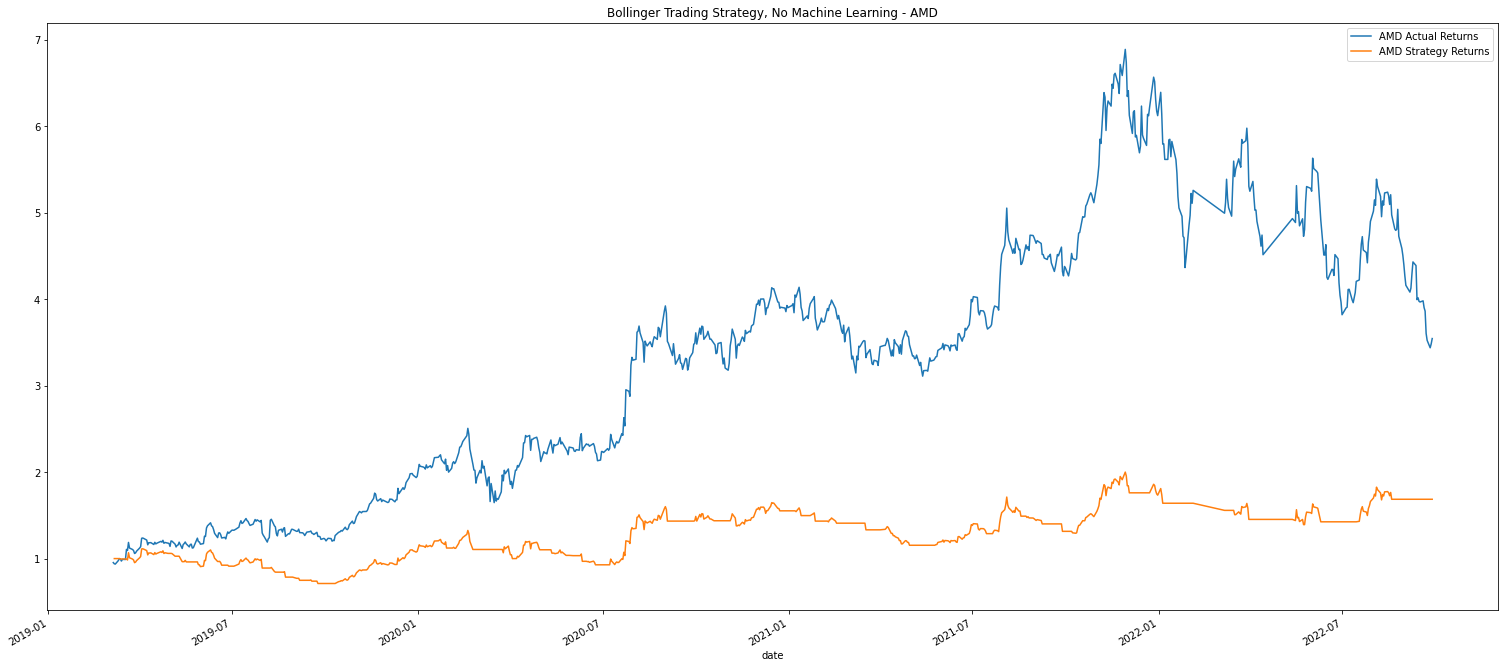

In [1292]:
# Plot AMD Strategy Returns to examine performance
(1 + amd_signals_df[['AMD Actual Returns', 'AMD Strategy Returns']]).cumprod().plot(title='Bollinger Trading Strategy, No Machine Learning - AMD', figsize=(26, 12))
plt.savefig('./images/AMD_bol_no_ml_strategy.png')

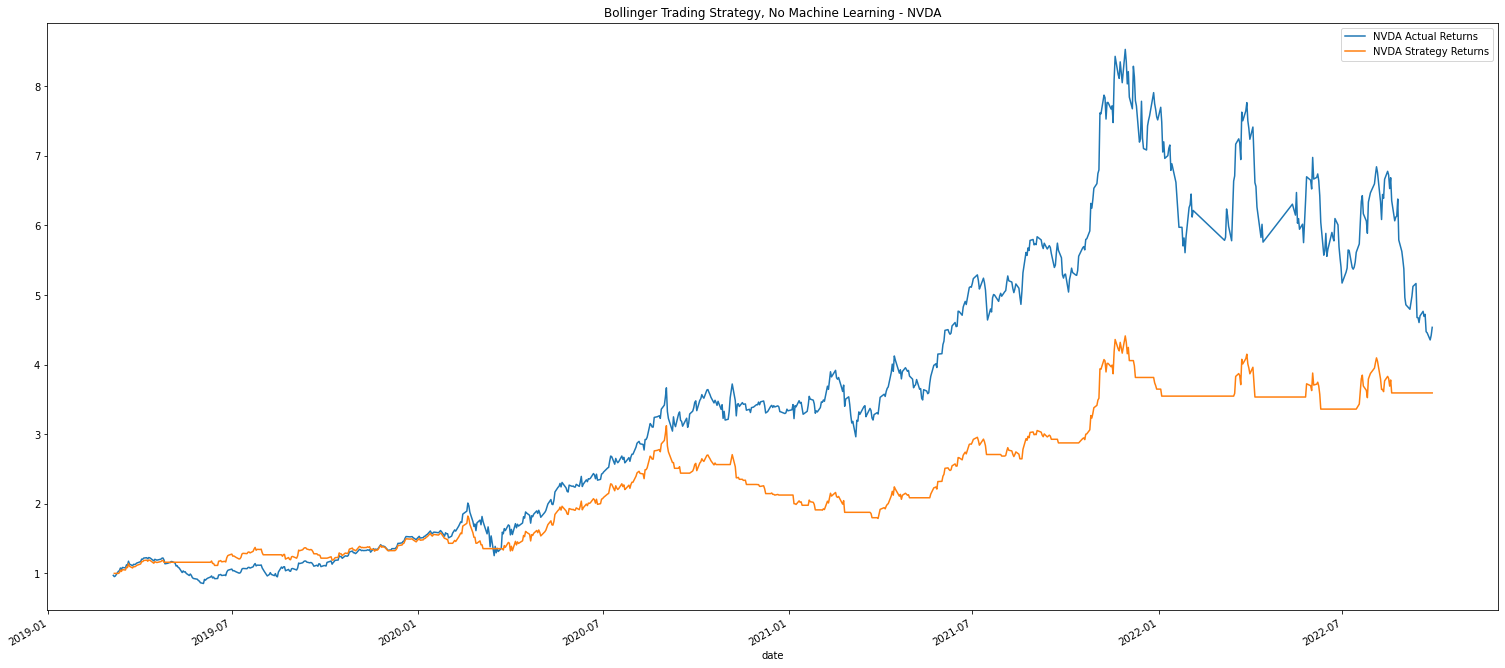

In [1293]:
# Plot NVDA Strategy Returns to examine performance
(1 + nvda_signals_df[['NVDA Actual Returns', 'NVDA Strategy Returns']]).cumprod().plot(title='Bollinger Trading Strategy, No Machine Learning - NVDA', figsize=(26, 12))
plt.savefig('./images/NVDA_bol_no_ml_strategy.png')

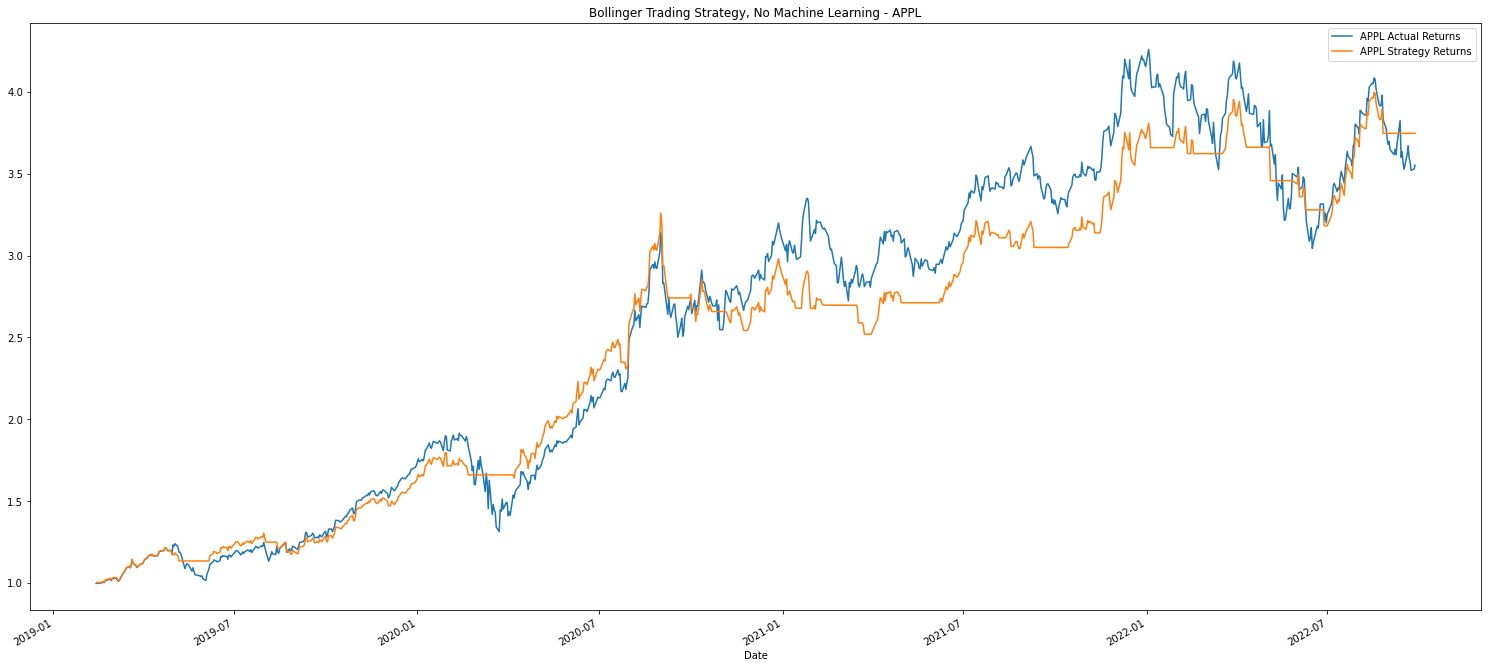

In [1266]:
# Plot APPL Strategy Returns to examine performance
(1 + appl_signals_df[['APPL Actual Returns', 'APPL Strategy Returns']]).cumprod().plot(title='Bollinger Trading Strategy, No Machine Learning - APPL', figsize=(26, 12))
plt.savefig('./images/APPL_bol_no_ml_strategy.png')
# (1 + amd_signals_df['AMD Strategy Returns']).cumprod().plot(title='??? Trading Strategy, No Machine Learning')
# (1 + nvda_signals_df['NVDA Strategy Returns']).cumprod().plot()

## (IGNORE) Algorithmic Trading - Backtest trading strategy

#### Execute trades (buy, hold, sell) and calculate P&L

In [611]:
# df, accumulated_shares = trade.gain_loss(df, share_size)

AttributeError: module 'trade' has no attribute 'gain_loss'